# 1. Import modules

In [1]:
import os
import glob
import random
import warnings
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, pooling
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Modeling and training

In [3]:
categories = [("꼬깔콘", 0), ("꼬북칩", 1), ("맛동산", 2), ("새우깡", 3), ("에이스", 4), ("오징어 땅콩", 5), ("카스타드", 6), ("포카칩", 7), ("프링글스", 8), ("홈런볼", 9)]

X_train, y_train = [], []
X_test, y_test = [], []

In [4]:
for i, v in enumerate(categories) : 
    # one-hot encoding
    label = [0 for _ in range(len(categories))]
    label[i] = 1
    
    # path setting
    image_dir = "/content/drive/My Drive/data/train/" + v[0] + "/*.jpg"
    files = glob.glob(image_dir)
    
    # trainset setting
    for file in files :
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((128, 128))
        data = np.asarray(image)
        
        X_train.append(data)
        y_train.append(label)

In [6]:
for i, v in enumerate(categories) : 
    # one-hot encoding
    label = [0 for _ in range(len(categories))]
    label[i] = 1
    
    # path setting
    image_dir = "/content/drive/My Drive/data/test/" + v[0] + "/*.jpg"
    files = glob.glob(image_dir)
    
    # testset setting
    for file in files :
        try:
            image = Image.open(file)
            image = image.convert("RGB")
            image = image.resize((128, 128))
            data = np.asarray(image)

            X_test.append(data)
            y_test.append(label)
        except Exception as e:
            print(e)
            pass

cannot identify image file '/content/drive/My Drive/data/test/꼬북칩/꼬북칩_0127.jpg'


In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

In [10]:
# scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
# define model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(categories), activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 6,300,490
Trainable params: 6,300,490
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# hyper parameter settings
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint 
model_path = "/content/drive/My Drive/snacks_classification_ann.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_bset_only=True)

In [20]:
# train
history=model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=10, verbose=1, callbacks=[checkpoint])

Epoch 1/10
279/288 [============================>.] - ETA: 0s - loss: 1.9935 - accuracy: 0.2576
Epoch 1: saving model to /content/drive/My Drive/snacks_classification_ann.model
288/288 [==============================] - 2s 8ms/step - loss: 1.9964 - accuracy: 0.2568 - val_loss: 10.2532 - val_accuracy: 0.0000e+00
Epoch 2/10
285/288 [============================>.] - ETA: 0s - loss: 1.9959 - accuracy: 0.2571
Epoch 2: saving model to /content/drive/My Drive/snacks_classification_ann.model
288/288 [==============================] - 2s 8ms/step - loss: 1.9967 - accuracy: 0.2568 - val_loss: 10.2161 - val_accuracy: 0.0000e+00
Epoch 3/10
285/288 [============================>.] - ETA: 0s - loss: 1.9958 - accuracy: 0.2578
Epoch 3: saving model to /content/drive/My Drive/snacks_classification_ann.model
288/288 [==============================] - 2s 8ms/step - loss: 1.9969 - accuracy: 0.2568 - val_loss: 10.2986 - val_accuracy: 0.0000e+00
Epoch 4/10
284/288 [============================>.] - ETA: 0s

In [21]:
# evaluation 
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[2.8131251335144043, 0.18857938051223755]


# 3. Training history

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epoch_range = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

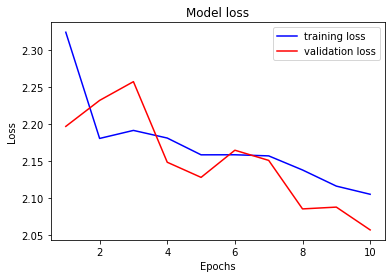

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss graph visualization
plt.plot(epoch_range, loss, 'b', label='training loss')
plt.plot(epoch_range, val_loss, 'r', label='validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

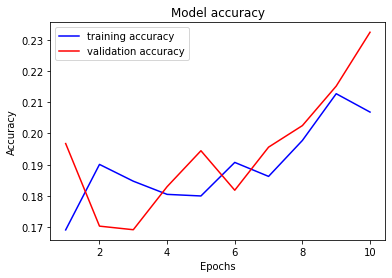

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracy graph visualization
plt.plot(epoch_range, acc, 'b', label='training accuracy')
plt.plot(epoch_range, val_acc, 'r', label='validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()